In [22]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [31]:
dat = pd.read_csv('../data/higgs-boson/training.csv')
dat.loc[dat.Label == 's', 'Label']=1
dat.loc[dat.Label == 'b', 'Label']=0
class Higgs(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe
    def __len__(self):
        return(self.dataframe.shape[0])
    def __getitem__(self, i):
        row = self.dataframe.iloc[i,:]
        inp = row[[x for x in self.dataframe.columns if x not in ['EventId', 'Label']]]
        out = row[['Label']]
        return(np.array(inp).astype('float32'), np.array(out[0]).astype('uint8'))

dl = DataLoader(Higgs(dat), batch_size=2)

In [32]:
#h = Higgs(dat)
#h.__getitem__(4)
next(iter(dl))

/var/folders/9r/1rqvn79x3mz8n_knlfpfzk440000gn/T/ipykernel_26149/27022088.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(np.array(inp).astype('float32'), np.array(out[0]).astype('uint8'))
/var/folders/9r/1rqvn79x3mz8n_knlfpfzk440000gn/T/ipykernel_26149/27022088.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return(np.array(inp).astype('float32'), np.array(out[0]).astype('uint8'))


[tensor([[ 1.3847e+02,  5.1655e+01,  9.7827e+01,  2.7980e+01,  9.1000e-01,
           1.2471e+02,  2.6660e+00,  3.0640e+00,  4.1928e+01,  1.9776e+02,
           1.5820e+00,  1.3960e+00,  2.0000e-01,  3.2638e+01,  1.0170e+00,
           3.8100e-01,  5.1626e+01,  2.2730e+00, -2.4140e+00,  1.6824e+01,
          -2.7700e-01,  2.5873e+02,  2.0000e+00,  6.7435e+01,  2.1500e+00,
           4.4400e-01,  4.6062e+01,  1.2400e+00, -2.4750e+00,  1.1350e+02,
           2.6533e-03],
         [ 1.6094e+02,  6.8768e+01,  1.0324e+02,  4.8146e+01, -9.9900e+02,
          -9.9900e+02, -9.9900e+02,  3.4730e+00,  2.0780e+00,  1.2516e+02,
           8.7900e-01,  1.4140e+00, -9.9900e+02,  4.2014e+01,  2.0390e+00,
          -3.0110e+00,  3.6918e+01,  5.0100e-01,  1.0300e-01,  4.4704e+01,
          -1.9160e+00,  1.6455e+02,  1.0000e+00,  4.6226e+01,  7.2500e-01,
           1.1580e+00, -9.9900e+02, -9.9900e+02, -9.9900e+02,  4.6226e+01,
           2.2336e+00]]),
 tensor([1, 0], dtype=torch.uint8)]

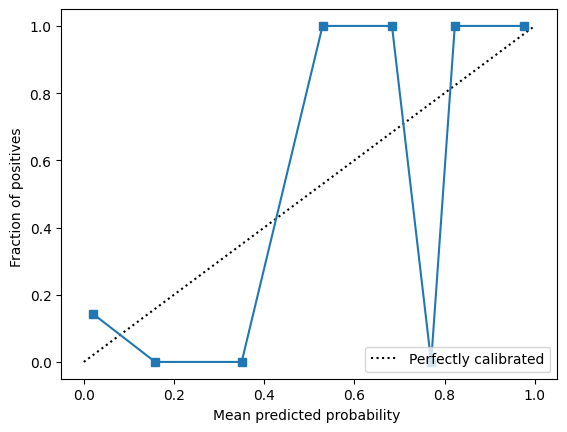

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve, CalibrationDisplay
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
disp = CalibrationDisplay(prob_true, prob_pred, y_prob)
disp.plot()

In [36]:
!pip install uncertainty_metrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.5 MB/s eta 0:00:00


In [43]:
import uncertainty_metrics.numpy as um


ece = um.ece(y_test, y_prob, num_bins=30); print("ECE: ", ece)
ace = um.adaptive_calibration_error(y_test, y_prob, num_bins = 30); print("ACE: ", ace)
tace = um.tace(y_test, y_prob, num_bins = 30); print("TACE: ", tace)

ECE:  0.1674910153333149
ACE:  0.17380975868887763
TACE:  0.2017910169595603


In [2]:
# import libraries

# data manipulation
import pandas as pd
import numpy as np

# text processing
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))

# utils
import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shairozs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shairozs\AppData\Roaming\nltk_data...


In [66]:
data = pd.read_csv('../data/IMDB Dataset.csv')
data.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [73]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 326.8 kB/s eta 0:01:14
    --------------------------------------- 0.5/24.0 MB 3.9 MB/s eta 0:00:06
   ------- -------------------------------- 4.5/24.0 MB 25.9 MB/s eta 0:00:01
   ---------- ----------------------------- 6.3/24.0 MB 33.6 MB/s eta 0:00:01
   ------------ --------------------------- 7.3/24.0 MB 29.3 MB/s eta 0:00:01
   ------------ --------------------------- 7.3/24.0 MB 29.3 MB/s eta 0:00:01
   ----------------- ---------------------- 10.5/24.0 MB 50.4 MB/s eta 0:00:01
   ----------------- ---------------------- 10.6/24.0 MB 40.9 MB/s eta 0:00:01
   ------------------------- -------------- 15.4/24.0 MB 43.7 MB/s eta 0:00:01
   -------------------------- ------------- 15.7/24.0 MB 40.9 MB/s eta 0:00:01
   ---

In [77]:
# Import libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
# Import libraries
import numpy as np
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

# download modules for text processing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shairozs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shairozs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shairozs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [74]:
def preprocess_text(review):
    # Convert to lowercase
    review = review.lower()

    # Remove HTML tags
    soup = BeautifulSoup(review, "html.parser")
    review = soup.get_text()
    
    # Remove special characters, numbers, and extra whitespace
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()

    # Remove URL's
    review = re.sub(r'https?://\S+|www\.\S+', '', review)
    
    # Tokenization
    tokens = word_tokenize(review)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Function to apply Avg Word2Vec
def apply_avg_word2vec(texts, model):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(text.split(), model, vocabulary, model.vector_size) for text in texts]
    return pd.DataFrame(features)
    
# Generate feature vectors for Word2Vec
def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float32")
        nwords = 0.
        for word in words:
            if word in vocabulary:
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
        return feature_vector

In [71]:
df = data
df['processed_review'] = df['review'].apply(preprocess_text)
df.head()

C:\Users\shairozs\AppData\Local\Temp\1\ipykernel_9580\387629468.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(review, "html.parser")


review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                    processed_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...

In [75]:
# Separate the positive and negative comments
positive_comments = df[df['sentiment'] == 'positive']['processed_review'].str.cat(sep=' ')
negative_comments = df[df['sentiment'] == 'negative']['processed_review'].str.cat(sep=' ')

In [78]:
# Train Word2Vec model on the cleaned texts
sentences = [text.split() for text in df['processed_review']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
print('done.')

# Apply average Word2Vec to the cleaned texts
word2vec_features = apply_avg_word2vec(df['processed_review'], word2vec_model)
print('done.')

# Rename columns of word2vec_features
word2vec_features.columns = [f'word2vec_feature_{i}' for i in range(word2vec_features.shape[1])]
print('done.')


class_label_encoder = LabelEncoder()
print('done.')


df['sentiment_encoded'] = class_label_encoder.fit_transform(df['sentiment'])

df.head()


done.
done.
done.
done.


review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                    processed_review  sentiment_encoded  
0  one reviewer mentioned watching oz episode you...                  1  
1  wonderful little production filming technique ...                  1  
2  thought wonderful way spend time hot summer we...                  1  
3  basically there family little boy jake think t...                  0  
4  petter matteis love time money visually stunni...                  1

In [79]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(word2vec_features,df['sentiment_encoded'],test_size=0.20)

In [89]:
print(X_train.shape, y_train.shape)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
np.concatenate([X_train, y_train[:, np.newaxis]], axis = 1).shape

(40000, 100) (40000,)


(40000, 101)

In [90]:
np.save('../data/IMDB Dataset_clean_train.npy', np.concatenate([X_train, y_train[:, np.newaxis]], axis = 1))
np.save('../data/IMDB Dataset_clean_test.npy',  np.concatenate([X_test, y_test[:, np.newaxis]], axis = 1))

In [4]:
def transform_label(label):
    return 1 if label == 'positive' else 0

data['label'] = data['sentiment'].progress_apply(transform_label)

100%|███████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 1224356.92it/s]


In [5]:
data['token_length'] = data.review.progress_apply(lambda x: len(x.split()))

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 65441.68it/s]


In [6]:
# text cleaning

def rm_link(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

# handle case like "shut up okay?Im only 10 years old"
# become "shut up okay Im only 10 years old"
def rm_punct2(text):
    # return re.sub(r'[\!\"\#\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)
    return re.sub(r'[\"\#\$\%\&\'\(\)\*\+\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)

def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)

def space_bt_punct(text):
    pattern = r'([.,!?-])'
    s = re.sub(pattern, r' \1 ', text)     # add whitespaces between punctuation
    s = re.sub(r'\s{2,}', ' ', s)        # remove double whitespaces    
    return s

def rm_number(text):
    return re.sub(r'\d+', '', text)

def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)

def rm_nonascii(text):
    return re.sub(r'[^\x00-\x7f]', r'', text)

def rm_emoji(text):
    emojis = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emojis.sub(r'', text)

def spell_correction(text):
    return re.sub(r'(.)\1+', r'\1\1', text)

def clean_pipeline(text):    
    no_link = rm_link(text)
    no_html = rm_html(no_link)
    space_punct = space_bt_punct(no_html)
    no_punct = rm_punct2(space_punct)
    no_number = rm_number(no_punct)
    no_whitespaces = rm_whitespaces(no_number)
    no_nonasci = rm_nonascii(no_whitespaces)
    no_emoji = rm_emoji(no_nonasci)
    spell_corrected = spell_correction(no_emoji)
    return spell_corrected

In [7]:
# preprocessing
def tokenize(text):
    return word_tokenize(text)

def rm_stopwords(text):
    return [i for i in text if i not in stopwords]

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()    
    lemmas = [lemmatizer.lemmatize(t) for t in text]
    # make sure lemmas does not contains sotpwords
    return rm_stopwords(lemmas)

def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\shairozs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [10]:
data['clean'] = data['review'].progress_apply(clean_pipeline)
data['processed'] = data['clean'].progress_apply(preprocess_pipeline)
data.head()

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:27<00:00, 574.19it/s]


review sentiment  label  \
0  One of the other reviewers has mentioned that ...  positive      1   
1  A wonderful little production. <br /><br />The...  positive      1   
2  I thought this was a wonderful way to spend ti...  positive      1   
3  Basically there's a family where a little boy ...  negative      0   
4  Petter Mattei's "Love in the Time of Money" is...  positive      1   

   token_length                                              clean  \
0           307  One of the other reviewers has mentioned that ...   
1           162  A wonderful little production . The filming te...   
2           166  I thought this was a wonderful way to spend ti...   
3           138  Basically there s a family where a little boy ...   
4           230  Petter Mattei s Love in the Time of Money is a...   

                                           processed  
0  One reviewer mentioned watching Oz episode hoo...  
1  A wonderful little production . The filming te...  
2  I thought wonderful way spend time hot summer ...  
3  Basically family little boy Jake think zombie ...  
4  Petter Mattei Love Time Money visually stunnin...

In [11]:
data['split'] = np.random.choice(a = ['train', 'test'], p = (0.75, 0.25), size = len(data))

In [12]:
data.head()

review sentiment  label  \
0  One of the other reviewers has mentioned that ...  positive      1   
1  A wonderful little production. <br /><br />The...  positive      1   
2  I thought this was a wonderful way to spend ti...  positive      1   
3  Basically there's a family where a little boy ...  negative      0   
4  Petter Mattei's "Love in the Time of Money" is...  positive      1   

   token_length                                              clean  \
0           307  One of the other reviewers has mentioned that ...   
1           162  A wonderful little production . The filming te...   
2           166  I thought this was a wonderful way to spend ti...   
3           138  Basically there s a family where a little boy ...   
4           230  Petter Mattei s Love in the Time of Money is a...   

                                           processed  split  
0  One reviewer mentioned watching Oz episode hoo...   test  
1  A wonderful little production . The filming te...  train  
2  I thought wonderful way spend time hot summer ...   test  
3  Basically family little boy Jake think zombie ...  train  
4  Petter Mattei Love Time Money visually stunnin...   test

In [13]:
data.to_csv(path_or_buf='../data/IMDB Dataset_clean.csv', index = False)

In [14]:
# https://www.kaggle.com/code/affand20/imdb-with-pytorch

# read processed data
data = pd.read_csv('../data/IMDB Dataset_clean.csv')


# get all processed reviews
reviews = data.processed.values
# merge into single variable, separated by whitespaces
words = ' '.join(reviews)
# obtain list of words
words = words.split()

# build vocabulary
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}

# encode words
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]

# padding sequences

def pad_features(reviews, pad_id, seq_length=128):
    # features = np.zeros((len(reviews), seq_length), dtype=int)
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)

    for i, row in enumerate(reviews):
        # if seq_length < len(row) then review will be trimmed
        features[i, :len(row)] = np.array(row)[:seq_length]

    return features

seq_length = 256
features = pad_features(reviews_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)

assert len(features) == len(reviews_enc)
assert len(features[0]) == seq_length

# get labels as numpy
labels = data.label.to_numpy()

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:01<00:00, 28226.55it/s]


In [46]:
# train test split
train_size = .7     # we will use 80% of whole data as train set
val_size = .5       # and we will use 50% of test set as validation set

# make train set
split_id = int(len(features) * train_size)
train_x, remain_x = features[:split_id], features[split_id:]
train_y, remain_y = labels[:split_id], labels[split_id:]

# make val and test set
split_val_id = int(len(remain_x) * val_size)
val_x, test_x = remain_x[:split_val_id], remain_x[split_val_id:]
val_y, test_y = remain_y[:split_val_id], remain_y[split_val_id:]

# print out the shape
print('Feature Shapes:')
print('===============')
print('Train set: {}'.format(train_x.shape))
print('Validation set: {}'.format(val_x.shape))
print('Test set: {}'.format(test_x.shape))

Feature Shapes:
Train set: (35000, 256)
Validation set: (7500, 256)
Test set: (7500, 256)


In [47]:
train_x[12,:]

array([  158,  8045,   139,   120,  3985,    63,    51,     1,     3,
         419,     5, 25460,   321,  8045,     8,     1,  3985,   722,
        1089,   114,   262,  4355,  7408,   119,   494,    23,   304,
          23, 71000,     1,  1194,   419,   618, 71001, 23518,   894,
        2158,  3561,  5263,  9977,  1148,  2695,     2,  4355,  7408,
           1,     1,     1,    14,    72,   352,  3985, 71002,   204,
         272, 10686, 20494,     1,     1, 14644, 71003,   126,   352,
        3985,  3757,   212, 22645,    80,     1,   730,   896,    41,
         229, 16998, 21152,     2, 13833, 16214, 29372, 38741,     1,
        1991,   229,    88,    32,   437,   106,   139,     5, 13353,
           1,   158,   607,    41,    10,     2,   576, 16999,   168,
       16998, 21152,   768, 16999,   905, 10464, 47908,  1790,  2368,
           9,     9,   240,     3,    68, 71004,    54,     5,   106,
       13581,     1,     1,  1194,  7080,    22,  3877,   216,   134,
       16999,  4336,

In [50]:
#train_x = np.concatenate([train_x, train_y[:, np.newaxis]], axis = 1)
#val_x = np.concatenate([val_x, val_y[:, np.newaxis]], axis = 1)
test_x = np.concatenate([test_x, test_y[:, np.newaxis]], axis = 1)

In [51]:
np.save('../data/IMDB Dataset_clean_train.npy', np.concatenate([train_x, val_x]))
np.save('../data/IMDB Dataset_clean_test.npy', test_x)

In [22]:
np.save('../data/IMDB Dataset_clean_train.npy', train_x)
np.save('../data/IMDB Dataset_clean_val.npy', val_x)
np.save('../data/IMDB Dataset_clean_test.npy', test_x)

In [64]:
import torch
from torch.utils.data import Dataset, DataLoader

class IMDB(Dataset):

    def __init__(self, mode = 'train'):
        if mode == 'train':
            self.data = np.load('../data/IMDB Dataset_clean_train.npy')
            print("For mode = " + mode + " dataset shape: ", self.data.shape)
        elif mode == 'test':
            self.data = np.load('../data/IMDB Dataset_clean_test.npy')
            print("For mode = " + mode + " dataset shape: ", self.data.shape)

    def __len__(self):
        return(self.data.shape[0])

    def __getitem__(self, idx):
        d_x = self.data[idx, :256]
        d_y = self.data[idx, -1]
        d_x = torch.Tensor(d_x)
        d_y = torch.Tensor([d_y])
        return(d_x[np.newaxis,:], d_y)

In [65]:

ida = IMDB()
print([x.shape for x in ida.__getitem__(3)])
dlida = DataLoader(ida, batch_size = 5)

ex = next(iter(dlida))

print(ex[1].shape)

For mode = train dataset shape:  (42500, 257)
[torch.Size([1, 256]), torch.Size([1])]
torch.Size([5, 1])


In [ ]:
# Use the default tokenizer settings  
tokenizer = tfds.deprecated.text.Tokenizer()  
vocabulary_set = set()  
MAX_TOKENS = 0  
for example, label in imdb_train:  
  some_tokens = tokenizer.tokenize(example.numpy())  
  if MAX_TOKENS < len(some_tokens):  
            MAX_TOKENS = len(some_tokens)  
  vocabulary_set.update(some_tokens) 

In [58]:
imdb_encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set,  
                                                   lowercase=True,  
                                                   tokenizer=tokenizer)  
vocab_size = imdb_encoder.vocab_size 
print(vocab_size, MAX_TOKENS) 

93931 2525


In [59]:
# transformation functions to be used with the dataset  
from tensorflow.keras.preprocessing import sequence  
def encode_pad_transform(sample):  
    encoded = imdb_encoder.encode(sample.numpy())  
    pad = sequence.pad_sequences([encoded], padding='post',  
                                 maxlen=150)  
    return np.array(pad[0], dtype=np.int64)  
def encode_tf_fn(sample, label):  
    encoded = tf.py_function(encode_pad_transform,  
                                       inp=[sample],  
                                       Tout=(tf.int64))  
    encoded.set_shape([None])  
    label.set_shape([])  
    return encoded, label 

In [60]:
encoded_train = imdb_train.map(encode_tf_fn,                                               num_parallel_calls=tf.data.experimental.AUTOTUNE) 
encoded_test = imdb_test.map(encode_tf_fn,                      num_parallel_calls=tf.data.experimental.AUTOTUNE) 

In [74]:
# Download the GloVe embeddings  
!curl -O http://nlp.stanford.edu/data/glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   308  100   308    0     0   6684      0 --:--:-- --:--:-- --:--:--  7333


In [77]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of glove.6B.zip or
        glove.6B.zip.zip, and cannot find glove.6B.zip.ZIP, period.


In [78]:
dict_w2v = {} 
with open('../data/glove/glove.6B.50d.txt', "r") as file:     
    for line in file:         
       tokens = line.split()      
       word = tokens[0]         
       vector = np.array(tokens[1:], dtype=np.float32) 
       if vector.shape[0] == 50:    
           dict_w2v[word] = vector 
       else:      
           print("There was an issue with " + word) 
# let's check the vocabulary size 
print("Dictionary Size: ", len(dict_w2v)) 

Dictionary Size:  400000


In [79]:
embedding_dim = 50  
embedding_matrix = np.zeros((imdb_encoder.vocab_size, embedding_dim)) 

In [80]:
unk_cnt = 0 
unk_set = set() 
for word in imdb_encoder.tokens:   
    embedding_vector = dict_w2v.get(word) 
    if embedding_vector is not None:         
        tkn_id = imdb_encoder.encode(word)[0] 
        embedding_matrix[tkn_id] = embedding_vector 
    else:         
        unk_cnt += 1         
        unk_set.add(word) 
# Print how many weren't found 
print("Total unknown words: ", unk_cnt)

Total unknown words:  14553


In [82]:
embedding_matrix.shape

(93931, 50)

In [85]:
imdb_encoder

<TokenTextEncoder vocab_size=93931>